<img src="https://i.esdrop.com/d/7o0dj05m8rnz/JNGCMedl18.png" width="45%">

# 1. Import python package

In [1]:
# Visual Python: Data Analysis > Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# 2. Load files

In [2]:
# Visual Python: Data Analysis > File
df_tips = pd.read_csv('./data/tips.csv')
df_tips

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


In [3]:
# Visual Python: Data Analysis > File
df_w = pd.read_csv('./data/washing_machine.csv')
df_w

,category_code,model_name,regist_country,create_dt_utc,device_id,event_type,State
0,201,LG_WM_KR,KR,16/11/2017 0:22,A1,WM_STATE,40
1,201,LG_WM_KR,KR,16/11/2017 0:32,A1,WM_STATE,60
2,201,LG_WM_KR,KR,16/11/2017 0:32,A1,WM_WASH_END,60
3,201,LG_WM_KR,KR,16/11/2017 2:48,A1,COMMON_WIFI_ON,30
4,201,LG_WM_KR,KR,16/11/2017 2:57,A1,WM_STATE,60
...,...,...,...,...,...,...,...
495,201,LG_WM_KR,KR,20/11/2017 10:18,A5,WM_STATE,23
496,201,LG_WM_KR,KR,20/11/2017 11:19,A5,WM_STATE,30
497,201,LG_WM_KR,KR,20/11/2017 11:56,A5,WM_STATE,40
498,201,LG_WM_KR,KR,20/11/2017 12:04,A5,WM_STATE,60


# 3. Group by

#### Specify:
1) Group by column(s)
2) Aggregate column(s)
3) Aggregate function(s)

## 3.1 Single aggregate function

### 3.1.1 Group by `day`, Agg. function: `mean()`

In [4]:
# Visual Python: Data Analysis > Groupby
df_tips.groupby('day').mean(numeric_only=True)

,total_bill,tip,size
day,,,
Fri,17.151579,2.734737,2.105263
Sat,20.441379,2.993103,2.517241
Sun,21.410000,3.255132,2.842105
Thur,17.682742,2.771452,2.451613


### 3.1.2 Group by `day`, `smoker`, Agg. function: `mean()`

In [5]:
# Visual Python: Data Analysis > Groupby
df_tips.groupby(['day','smoker']).mean(numeric_only=True)

total_bill       tip      size
day  smoker                                
Fri  No       18.420000  2.812500  2.250000
     Yes      16.813333  2.714000  2.066667
Sat  No       19.661778  3.102889  2.555556
     Yes      21.276667  2.875476  2.476190
Sun  No       20.506667  3.167895  2.929825
     Yes      24.120000  3.516842  2.578947
Thur No       17.113111  2.673778  2.488889
     Yes      19.190588  3.030000  2.352941

### 3.1.3 Group by `day`, Agg. column: `total_bill`, Agg. function: `mean()`

In [6]:
# Visual Python: Data Analysis > Groupby
df_tips.groupby('day')['total_bill'].mean(numeric_only=True)

day
Fri     17.151579
Sat     20.441379
Sun     21.410000
Thur    17.682742
Name: total_bill, dtype: float64

### 3.1.4 Group by `day`, Agg. columns: `total_bill`, `tip`, Agg. function: `mean()`

In [7]:
# Visual Python: Data Analysis > Groupby
df_tips.groupby('day')[['total_bill','tip']].mean(numeric_only=True)

,total_bill,tip
day,,
Fri,17.151579,2.734737
Sat,20.441379,2.993103
Sun,21.410000,3.255132
Thur,17.682742,2.771452


## 3.2 Multiple aggregate functions

### 3.2.1 Group by `day`, Agg. columns: `total_bill`, `tip`, Agg. functions: std()`, `mean()`

In [8]:
# Visual Python: Data Analysis > Groupby
df_tips.groupby('day')[['total_bill','tip']].agg(['std', 'mean'])

total_bill                  tip          
            std       mean       std      mean
day                                           
Fri    8.302660  17.151579  1.019577  2.734737
Sat    9.480419  20.441379  1.631014  2.993103
Sun    8.832122  21.410000  1.234880  3.255132
Thur   7.886170  17.682742  1.240223  2.771452

### 3.2.2 Group by `day`, Agg. columns: `total_bill`, `tip`, Agg. functions: `std()`, `mean()`, Rename: `STD`, `AVG`

In [9]:
# Visual Python: Data Analysis > Groupby
df_tips.groupby('day')[['total_bill','tip']].agg([('STD', 'std'), ('AVG', 'mean')])

total_bill                  tip          
            STD        AVG       STD       AVG
day                                           
Fri    8.302660  17.151579  1.019577  2.734737
Sat    9.480419  20.441379  1.631014  2.993103
Sun    8.832122  21.410000  1.234880  3.255132
Thur   7.886170  17.682742  1.240223  2.771452

## 3.3 Multiple aggregate functions for each column

### 3.3.1 Group by `day`, Agg. columns: `total_bill`, `tip`, Agg. functions: `total_bill - sum()`, `tip - mean()`

In [10]:
# Visual Python: Data Analysis > Groupby
df_tips.groupby('day')[['total_bill','tip']].agg({'total_bill': 'sum', 'tip': 'mean'})

,total_bill,tip
day,,
Fri,325.88,2.734737
Sat,1778.40,2.993103
Sun,1627.16,3.255132
Thur,1096.33,2.771452


### 3.3.2 Group by `day`, Agg. columns: `total_bill`, `tip`, Agg. functions: `total_bill - sum()`, `tip - std(), max(), mean(), median()`

In [11]:
# Visual Python: Data Analysis > Groupby
df_tips.groupby('day')[['total_bill','tip']].agg({'total_bill': 'sum', 'tip': ['std','max','mean','median']})

total_bill       tip                        
            sum       std    max      mean median
day                                              
Fri      325.88  1.019577   4.73  2.734737  3.000
Sat     1778.40  1.631014  10.00  2.993103  2.750
Sun     1627.16  1.234880   6.50  3.255132  3.150
Thur    1096.33  1.240223   6.70  2.771452  2.305

### 3.3.3 Group by `day`, Agg. columns: `total_bill`, `tip`, Agg. functions: `total_bill - sum()`, `tip - std(), mean()`, Rename: `SUM`, `STD`, `AVG`

In [12]:
# Visual Python: Data Analysis > Groupby
df_tips.groupby('day')[['total_bill','tip']].agg({'total_bill': [('SUM', 'sum')], 'tip': [('STD', 'std'),('AVG', 'mean')]})

total_bill       tip          
            SUM       STD       AVG
day                                
Fri      325.88  1.019577  2.734737
Sat     1778.40  1.631014  2.993103
Sun     1627.16  1.234880  3.255132
Thur    1096.33  1.240223  2.771452

## 3.4 reset_index
```Check reset_index```

In [13]:
# Visual Python: Data Analysis > Groupby
df_tips.groupby(['day','smoker'], as_index=False).mean(numeric_only=True)

,day,smoker,total_bill,tip,size
0,Fri,No,18.420000,2.812500,2.250000
1,Fri,Yes,16.813333,2.714000,2.066667
2,Sat,No,19.661778,3.102889,2.555556
3,Sat,Yes,21.276667,2.875476,2.476190
4,Sun,No,20.506667,3.167895,2.929825
5,Sun,Yes,24.120000,3.516842,2.578947
6,Thur,No,17.113111,2.673778,2.488889
7,Thur,Yes,19.190588,3.030000,2.352941


In [14]:
# Visual Python: Data Analysis > Groupby
df_tips.groupby('day', as_index=False)['tip'].mean(numeric_only=True)

,day,tip
0,Fri,2.734737
1,Sat,2.993103
2,Sun,3.255132
3,Thur,2.771452


## 3.5 Result: Series to DataFrame
```Check To DataFrame```

In [15]:
# Visual Python: Data Analysis > Groupby
df_tips.groupby('day')[['tip']].mean(numeric_only=True)

,tip
day,
Fri,2.734737
Sat,2.993103
Sun,3.255132
Thur,2.771452


# 4 Grouper

### 4.1 As type(object --> datetime)

In [16]:
# Visual Python: Data Analysis > Frame
df_w = df_w.astype({'create_dt_utc': 'datetime64[ns]'})
df_w

,category_code,model_name,regist_country,create_dt_utc,device_id,event_type,State
0,201,LG_WM_KR,KR,2017-11-16 00:22:00,A1,WM_STATE,40
1,201,LG_WM_KR,KR,2017-11-16 00:32:00,A1,WM_STATE,60
2,201,LG_WM_KR,KR,2017-11-16 00:32:00,A1,WM_WASH_END,60
3,201,LG_WM_KR,KR,2017-11-16 02:48:00,A1,COMMON_WIFI_ON,30
4,201,LG_WM_KR,KR,2017-11-16 02:57:00,A1,WM_STATE,60
...,...,...,...,...,...,...,...
495,201,LG_WM_KR,KR,2017-11-20 10:18:00,A5,WM_STATE,23
496,201,LG_WM_KR,KR,2017-11-20 11:19:00,A5,WM_STATE,30
497,201,LG_WM_KR,KR,2017-11-20 11:56:00,A5,WM_STATE,40
498,201,LG_WM_KR,KR,2017-11-20 12:04:00,A5,WM_STATE,60


### 4.2 Group by `Grouper(create_dt_utc)`,  Agg. function: `size`

In [17]:
# Visual Python: Data Analysis > Groupby
df_count = df_w.groupby(pd.Grouper(key='create_dt_utc', freq='4H')).size()
df_count

create_dt_utc
2017-11-16 00:00:00    25
2017-11-16 04:00:00     7
2017-11-16 08:00:00    16
2017-11-16 12:00:00    31
2017-11-16 16:00:00     3
2017-11-16 20:00:00     8
2017-11-17 00:00:00    16
2017-11-17 04:00:00    14
2017-11-17 08:00:00    34
2017-11-17 12:00:00     7
2017-11-17 16:00:00     0
2017-11-17 20:00:00     0
2017-11-18 00:00:00    35
2017-11-18 04:00:00    16
2017-11-18 08:00:00    24
2017-11-18 12:00:00    26
2017-11-18 16:00:00     0
2017-11-18 20:00:00    15
2017-11-19 00:00:00    29
2017-11-19 04:00:00    39
2017-11-19 08:00:00    33
2017-11-19 12:00:00    19
2017-11-19 16:00:00     0
2017-11-19 20:00:00     4
2017-11-20 00:00:00    39
2017-11-20 04:00:00    23
2017-11-20 08:00:00    26
2017-11-20 12:00:00     7
2017-11-20 16:00:00     0
2017-11-20 20:00:00     4
Freq: 4H, dtype: int64

### 4.3 Bar chart

In [18]:
# Visual Python: Visualization > Chart Style
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rc('figure', figsize=(8, 6))

from matplotlib import rcParams
rcParams['font.size'] = 10
rcParams['axes.unicode_minus'] = False

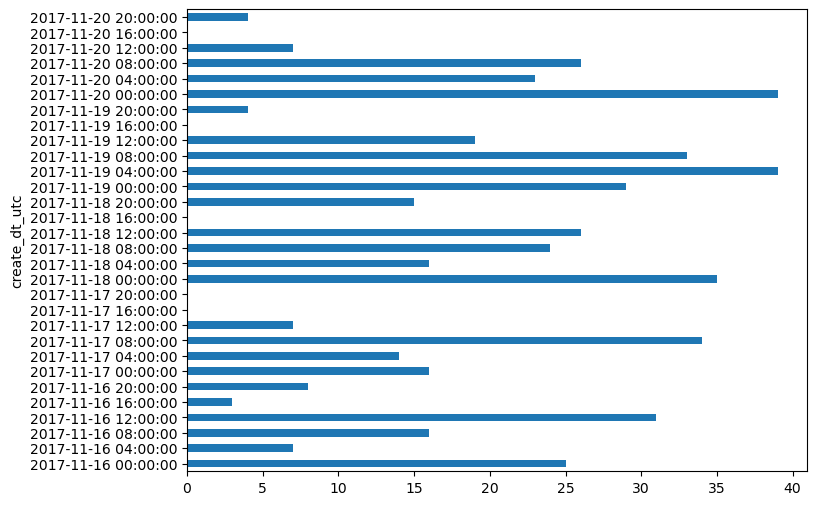

In [19]:
# Visual Python: Library > Pandas Plot
df_count.plot(kind='barh')
plt.show()

---

In [20]:
# End of file